# Project: Wrangling and Analyze Data

## Data Gathering
This section gathers the three pieces of data required for this project and loads them in the notebook. **Note:** the methods required to gather each data are different.

In [1]:
# Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

%matplotlib inline

1. Directly downloaded WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Reading in the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Tweet image prediction (image_predictions.tsv) downloaded using Requests library 

In [3]:
# Make a directory called Image Predictions if it doesn't already exist
folder_name = 'Image Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Download image-predictions.tsv file from url programmatically using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content) # Write url content into Image Predictions folder

In [4]:
# Read image-predictions.tsv file into a pandas dataframe
image_predictions = pd.read_csv('Image Predictions/image-predictions.tsv', sep="\t")

3. Additional data queried via the Twitter API using Tweepy library (tweet_json.txt)

In [5]:
pip install tweepy

In [6]:
# Import Tweepy
import tweepy

# Get API request authentication
consumer_key = '*****'
consumer_secret = '*****'
access_token = '*****'
access_secret = '*****'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,  wait_on_rate_limit=True)

In [7]:
# Create array of tweet ids from WeRateDogs Twitter archive data 
tweet_ids = twitter_archive['tweet_id'].values

In [8]:
# Create directory named Twitter if it does not already exist; This is to store data obtained from the Twitter API
folder_name = 'Twitter'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
# Import relevant packages
import json
from timeit import default_timer as timer

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open(os.path.join(folder_name, 'tweet_json.txt'), 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            fails[tweet_id] = e
            pass
end = timer()

Rate limit reached. Sleeping for: 38


In [10]:
# Processing time
print(end - start)

2427.274844200001


In [11]:
# Tweets that might have been deleted
print(fails.keys())

dict_keys([888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 856330835276025856, 851953902622658560, 851861385021730816, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 766864461642756096, 759923798737051648, 759566828574212096, 754011816964026368, 680055455951884288])


In [12]:
# Read tweet_json.txt file line by line 
tweet_list = []
with open('Twitter/tweet_json.txt') as txt_file:
    for data in txt_file:
        tweet = json.loads(data)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': tweet_id,
                           'retweet_count': int(retweet_count),
                           'favorite_count': int(favorite_count)})
    
# Create DataFrame from list of dictionaries
additional_data = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
This section seeks to assess and detect issues in the gathered data.

### DataFrame 1: `twitter_archive`

##### Visual Assessment

In [13]:
# Load the dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Programmatic Assessment

In [14]:
# View concise summary of the data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# Check for unique values in name column
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [16]:
# Check for count of unique values in name column
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
# Check for missing values
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Check for duplicates
twitter_archive.duplicated().sum()

0

In [19]:
# Check how many tweets are retweets
twitter_archive.retweeted_status_id.count()

181

In [20]:
# View summary statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### DataFrame 2: `image_predictions`

##### Visual Assessment

In [21]:
# Load the dataframe
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Programmatic Assessment

In [22]:
# View concise summary of the data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# Check for duplicates
image_predictions.duplicated().sum()

0

In [24]:
# Check the amount of tweets with 1, 2, 3 and 4 images
image_predictions.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
# Check values in column
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [26]:
# Check values in column
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [27]:
# Check values in column
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [28]:
# View summary statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### DataFrame 3: `additional_data`

##### Visual Assessment

In [29]:
# Load the dataframe
additional_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6963,33650
1,892177421306343426,5268,29197
2,891815181378084864,3463,21951
3,891689557279858688,7190,36765
4,891327558926688256,7709,35160
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,114,245
2324,666033412701032449,36,100
2325,666029285002620928,39,112


##### Programmatic Assessment

In [30]:
# View concise summary of the data
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [31]:
# Check for missing values
additional_data.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [32]:
# Check for duplicates
additional_data.duplicated().sum()

0

In [33]:
# View summary statistics
additional_data.describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2456.902020,7019.488612
std,4160.261394,10907.444775
min,1.000000,0.000000
25%,492.500000,1219.000000
50%,1143.000000,3033.000000
75%,2844.000000,8554.000000
max,70258.000000,144035.000000


### Quality issues
Some quality issues identified are:

1. There are missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns in the `twitter_archive` data. 

2. Timestamp columns in `twitter_archive` is in string instead of datetime datatype. We need the year and the month for each tweet.

3. Tweet_id columns in `twitter_archive` and `image_predictions` is in integer format instead of string.

4. Name column header is non-descriptive.

5. Some dog names are invalid.

6. Some tweets are retweets. We need the original tweets and not retweets.  

7. Some tweets are not about dogs.

8. Inaccurate ratings for some tweets. The rating denominator of the tweets should be fixed at 10.

9. Incorrect datatypes and missing values as a result of merging.

### Tidiness issues
Some tidiness issues identified are:

1. The variables; doggo, floofer, pupper and puppo, in the `twitter_archve` dataframe should be in one column.

2. The `additional_data` and `image_predictions` tables should be part of the twitter_archive table.

## Cleaning Data
This sections cleans the issues detected in the assessing data section.

In [34]:
# Make copies of original pieces of data
clean_twtarchive = twitter_archive.copy()
clean_img_predict = image_predictions.copy()
clean_add_data = additional_data.copy()

### Quality Issue #1: Missing values in the **twitter_archive** data.

#### Define
*Fill missing values in `twitter_archive` table with None*.

#### Code

In [35]:
clean_twtarchive = clean_twtarchive.fillna('None')

#### Test

In [36]:
# Check for number of missing values.
clean_twtarchive.isna().sum()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [37]:
# Check first five rows of the data.
clean_twtarchive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness Issue #1: The variables; doggo, floofer, pupper and puppo,  should be in one column.

#### Define
*Create a copy of the cleaned `twitter_archive` data. Melt the doggo, floofer, pupper and puppo columns into one column called 'class' and the values in another column called 'dog_class'. Select rows where the dog_class column is not with the value 'None' and name the new data table 'classified_dogs'. Merge the classified_dogs data to the copy of the cleaned twitter_archive data. Drop the doggo, floofer, pupper, puppo and class columns. Fill missing values with 'others' and drop duplicate tweet ids.*

#### Code

In [38]:
clean_twtarchive1 = clean_twtarchive.copy()

In [39]:
keep = np.array(clean_twtarchive.columns)[:-4]
clean_twtarchive = pd.melt(clean_twtarchive, id_vars= keep, value_vars=['doggo','floofer','pupper','puppo'], var_name='class',value_name='dog_class')

In [40]:
classified_dogs = clean_twtarchive[clean_twtarchive.dog_class != 'None']

In [41]:
clean_twtarchive = clean_twtarchive1.merge(classified_dogs, on=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 
                                                                'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 
                                                                'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 
                                                                'rating_denominator', 'name'], how='outer')

In [42]:
clean_twtarchive = clean_twtarchive.drop(columns=['doggo','floofer','pupper','puppo','class'])

In [43]:
clean_twtarchive = clean_twtarchive.fillna('others')
clean_twtarchive.drop_duplicates(subset= 'tweet_id', inplace=True)

#### Test

In [44]:
# Check if necessary columns have been created and dropped
clean_twtarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   int64 
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  2356 non-null   object
 9   expanded_urls               2356 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  dog_class                   2356 non-null   obje

In [45]:
# Check for duplicates
clean_twtarchive.tweet_id.duplicated().sum()

0

In [46]:
# Check for unique values in dog_class column
clean_twtarchive['dog_class'].unique()

array(['others', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Quality Issue #2: Timestamp columns in **twitter_archive** should be in datetime datatype. We need the year and the month for each tweet.

#### Define
*Convert timestamp column to datetime datatype. Extract the year and the month from timestamp column and create new columns called tweet_month and tweet_year.*

#### Code

In [47]:
clean_twtarchive['timestamp'] = pd.to_datetime(clean_twtarchive['timestamp'], yearfirst=True)

In [48]:
clean_twtarchive['tweet_month'] = clean_twtarchive['timestamp'].dt.month

In [49]:
clean_twtarchive['tweet_year'] = clean_twtarchive['timestamp'].dt.year

#### Test

In [50]:
# Check if necessary columns have been created
clean_twtarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  2356 non-null   object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [51]:
# View first five rows in tweet_month column
clean_twtarchive['tweet_month'].head()

0    8
1    8
2    7
3    7
4    7
Name: tweet_month, dtype: int64

In [53]:
# View first five rows in tweet_year column
clean_twtarchive['tweet_year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: tweet_year, dtype: int64

### Quality Issue #3: Tweet_id columns in **twitter_archive** and **image_predictions** is in integer format instead of string.

#### Define
*Convert tweet_id columns in twitter_archive and image_predictions from integer to string datatype using astype.*

#### Code

In [54]:
clean_twtarchive['tweet_id'] = clean_twtarchive['tweet_id'].astype(str)

In [55]:
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)

#### Test

In [56]:
# Check data types
clean_twtarchive.dtypes

tweet_id                                   object
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
dog_class                                  object
tweet_month                                 int64
tweet_year                                  int64
dtype: object

In [57]:
# Check data types
image_predictions.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Tidiness Issue #2: Additional_data and image_predictions tables should be part of the twitter_archive table.

#### Define
*Merge `additional_data` table and `image_predictions` table to `twitter_archive table`.*

#### Code

In [58]:
clean_twtarchive_master = pd.merge(clean_twtarchive, additional_data, 
                                   on='tweet_id', how='outer').merge(image_predictions, 
                                                                     on='tweet_id', how='outer')

#### Test

In [59]:
# Check columns to confirm if merge is successful
clean_twtarchive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_class', 'tweet_month', 'tweet_year',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [60]:
# View general summary of dataframe
clean_twtarchive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  2356 non-null   object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue #4 & #5: Name column header is non-descriptive. Some dog names are invalid. 

#### Define
*Rename 'name' column as 'dog_name'. Subset columns where 'dog_name' does not start with capital letter and replace with 'None'.*

#### Code

In [61]:
clean_twtarchive_master.rename(columns={'name':'dog_name'}, inplace=True)

In [62]:
invalid_names = list(clean_twtarchive_master.dog_name[clean_twtarchive_master['dog_name'].str.contains(r'(^[a-z]+)')])

for name in invalid_names:
        clean_twtarchive_master['dog_name'].replace(to_replace=name, value='None', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10792\293944669.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  invalid_names = list(clean_twtarchive_master.dog_name[clean_twtarchive_master['dog_name'].str.contains(r'(^[a-z]+)')])


#### Test

In [63]:
# Confirm if column name has been updated for 'name' column
clean_twtarchive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'dog_class', 'tweet_month',
       'tweet_year', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [64]:
# Return error if invalid names are still in dog_name column
for i in invalid_names:
    assert i not in clean_twtarchive_master.dog_name.array

In [65]:
# Check values in dog_name column
clean_twtarchive_master['dog_name'].value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: dog_name, Length: 932, dtype: int64

### Quality Issue #6: Some tweets are retweets. We need the original tweets and not retweets.

#### Define
*Select and drop rows where retweet_status_timestamp is not 'None'. Drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns.*

#### Code

In [66]:
retweets = clean_twtarchive_master.tweet_id[clean_twtarchive_master['retweeted_status_id'] != 'None']

In [67]:
# Drop rows where retweet_status_timestamp is not 'None'
clean_twtarchive_master = clean_twtarchive_master[clean_twtarchive_master['tweet_id'].isin(list(retweets)) == False]

In [68]:
clean_twtarchive_master.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                                      'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], inplace=True)

#### Test

In [69]:
# Confirm that retweets have been removed from the data
for r in retweets:
    assert r not in clean_twtarchive_master.tweet_id.array

In [70]:
# Confirm necessary columns have been dropped
clean_twtarchive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2175 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   dog_name            2175 non-null   object             
 8   dog_class           2175 non-null   object             
 9   tweet_month         2175 non-null   int64              
 10  tweet_year          2175 non-null   int64              
 11  retweet_count       2167 non-null   float64            
 12  favorite_count      2167 non-null 

### Quality Issue #7: Some tweets are not about dogs.

#### Define
*Subset rows where 'dog_class' column value is others, 'p1_dog', 'p2_dog' and 'p3_dog' column values are False and where 'p1_conf', 'p2_conf' or 'p3_conf' values are greater than 0.95, create a list of the tweet ids that satisfy those criteria and drop rows with tweet id that appears in list.*

#### Code

In [71]:
unclassified_dogs = clean_twtarchive_master[clean_twtarchive_master['dog_class'] == 'others']

In [72]:
not_dogs = unclassified_dogs[((unclassified_dogs['p1_dog'] == False) & (unclassified_dogs['p2_dog'] == False) 
                         & (unclassified_dogs['p3_dog'] == False))]

In [73]:
to_drop = not_dogs[((not_dogs['p1_conf'] >= 0.95) | (not_dogs['p2_conf'] >= 0.95) | (not_dogs['p3_conf'] >= 0.95))]
# Create list of tweet ids to drop
ids_to_drop = list(to_drop['tweet_id'])

In [74]:
clean_twtarchive_master = clean_twtarchive_master[clean_twtarchive_master['tweet_id'].isin(ids_to_drop) == False]

#### Test

In [75]:
# Confirm necessary rows have been dropped
for ids in ids_to_drop:
    assert ids not in clean_twtarchive_master['tweet_id'].array

In [76]:
# View five samples from the data
clean_twtarchive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_class,tweet_month,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2132,670079681849372674,2015-11-27 03:20:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,others,11,...,1.0,mud_turtle,0.157477,False,terrapin,0.131846,False,box_turtle,0.060678,False
2066,671147085991960577,2015-11-30 02:01:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9,10,None,others,11,...,1.0,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1980,672975131468300288,2015-12-05 03:05:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He is one skeptical pupper. ...,https://twitter.com/dog_rates/status/672975131...,10,10,Chuckles,pupper,12,...,1.0,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
329,833479644947025920,2017-02-20 00:53:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,others,2,...,3.0,golden_retriever,0.727039,True,cocker_spaniel,0.071140,True,Tibetan_mastiff,0.048694,True
480,815736392542261248,2017-01-02 01:48:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,others,1,...,3.0,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True


### Quality Issue #8: Inaccurate ratings for some tweets.The rating denominator of the tweets should be fixed at 10.

#### Define
*Select rows where rating denominator is not equal to 10 and drop those rows. Convert rating columns from string to integer datatype.*

#### Code

In [77]:
wrong_ratings = clean_twtarchive_master.tweet_id[clean_twtarchive_master['rating_denominator'] != 10].index

In [78]:
for ind in wrong_ratings:
    clean_twtarchive_master.drop(index=ind, inplace=True)

In [79]:
clean_twtarchive_master['rating_numerator'] = clean_twtarchive_master['rating_numerator'].astype(int)

In [80]:
clean_twtarchive_master['rating_denominator'] = clean_twtarchive_master['rating_denominator'].astype(int)

#### Test

In [81]:
# Confirm tweet_ids with wrong rating_denominator in data have been dropped
for w in wrong_ratings:
    assert w not in clean_twtarchive_master.tweet_id.array

In [82]:
# Check if rating denominator value for a tweets is fixed at value 10
clean_twtarchive_master['rating_denominator'].unique()

array([10])

In [83]:
# Confirm rating columns have been converted to integer datatype
clean_twtarchive_master.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int32
rating_denominator                  int32
dog_name                           object
dog_class                          object
tweet_month                         int64
tweet_year                          int64
retweet_count                     float64
favorite_count                    float64
jpg_url                            object
img_num                           float64
p1                                 object
p1_conf                           float64
p1_dog                             object
p2                                 object
p2_conf                           float64
p2_dog                             object
p3                                 object
p3_conf                           float64
p3_dog                            

### Quality Issue #9: Incorrect datatypes and missing values as a result of merging.

#### Define
*Fill missing values in columns with integer and float datatypes with 0. Convert: retweet_count and favorite_count columns to integer datatype, p1_conf, p2_conf and p3_conf columns to float, and p1_dog, p2_dog and p3_dog columns to boolean. Fill missing values in columns with object datatype with 'None'. Convert tweet_month column to category datatype with months as assigned category values. Reset the index of the cleaned data.*

#### Code

In [84]:
clean_twtarchive_master['retweet_count'] = clean_twtarchive_master['retweet_count'].fillna(0).astype(np.int64)

In [85]:
clean_twtarchive_master['favorite_count'] = clean_twtarchive_master['favorite_count'].fillna(0).astype(np.int64)

In [86]:
clean_twtarchive_master['p1_conf'] = clean_twtarchive_master['p1_conf'].fillna(0).astype(np.float64)

In [87]:
clean_twtarchive_master['p2_conf'] = clean_twtarchive_master['p2_conf'].fillna(0).astype(np.float64)

In [88]:
clean_twtarchive_master['p3_conf'] = clean_twtarchive_master['p3_conf'].fillna(0).astype(np.float64)

In [89]:
clean_twtarchive_master['p1_dog'] = clean_twtarchive_master['p1_dog'].fillna('None').astype(bool)

In [90]:
clean_twtarchive_master['p2_dog'] = clean_twtarchive_master['p2_dog'].fillna('None').astype(bool)

In [91]:
clean_twtarchive_master['p3_dog'] = clean_twtarchive_master['p3_dog'].fillna('None').astype(bool)

In [92]:
clean_twtarchive_master.fillna('None', inplace=True)

In [93]:
clean_twtarchive_master['tweet_month'] = clean_twtarchive_master['tweet_month'].astype('category')

from calendar import month_name as mn
months = mn[1:]

clean_twtarchive_master['tweet_month'] = clean_twtarchive_master['tweet_month'].cat.rename_categories(months)

In [94]:
clean_twtarchive_master.reset_index(inplace=True)
clean_twtarchive_master.drop(columns='index', inplace=True)

#### Test

In [95]:
# Check general summary of data
clean_twtarchive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2116 non-null   object             
 1   timestamp           2116 non-null   datetime64[ns, UTC]
 2   source              2116 non-null   object             
 3   text                2116 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2116 non-null   int32              
 6   rating_denominator  2116 non-null   int32              
 7   dog_name            2116 non-null   object             
 8   dog_class           2116 non-null   object             
 9   tweet_month         2116 non-null   category           
 10  tweet_year          2116 non-null   int64              
 11  retweet_count       2116 non-null   int64              
 12  favorite_count      2116 non-null 

In [96]:
# Confirm datatypes for necessary columns have been converted 
clean_twtarchive_master.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int32
rating_denominator                  int32
dog_name                           object
dog_class                          object
tweet_month                      category
tweet_year                          int64
retweet_count                       int64
favorite_count                      int64
jpg_url                            object
img_num                            object
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                            

In [97]:
# Confirm there are no missing values in the data
clean_twtarchive_master.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
dog_name              0
dog_class             0
tweet_month           0
tweet_year            0
retweet_count         0
favorite_count        0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dtype: int64

In [98]:
# View three samples from the data
clean_twtarchive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_class,tweet_month,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1318,690649993829576704,2016-01-22 21:39:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,others,January,...,1.0,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
1271,693642232151285760,2016-01-31 03:49:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Freddery. He's a Westminster Toblerone. S...,https://twitter.com/dog_rates/status/693642232...,9,10,Freddery,others,January,...,1.0,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True
1196,699775878809702401,2016-02-17 02:02:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,others,February,...,1.0,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
# Save wrangled master dataset to a CSV file named "twitter_archive_master.csv".
clean_twtarchive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
This section analyzes and visualizes the wrangled twitter archive master data; clean_twtarchive_master and also produces some insights into the data.

### <u> Analysis </u>
- Tweet with highest retweet and favorite counts. (i.e. highest interaction)

In [100]:
# Create new column called 'interact_count' which is the sum of retweet_count and favorite_count. This column shows the number of tweet interactions. 
clean_twtarchive_master['interact_count'] = clean_twtarchive_master['retweet_count'] + clean_twtarchive_master['favorite_count']
# Get the row/tweet with the highest interactions
clean_twtarchive_master[clean_twtarchive_master['interact_count'] == clean_twtarchive_master['interact_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_class,tweet_month,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,interact_count
850,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,June,...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,214293


- Dog class, excluding dog class 'others', with the highest retweet count.

In [101]:
# Group by dog_class and show retweet count for each dog_class
dog_class_retweet = clean_twtarchive_master.groupby('dog_class').retweet_count.sum()
dog_class_retweet

dog_class
doggo       442153
floofer      29840
others     3674420
pupper      441736
puppo       124116
Name: retweet_count, dtype: int64

- Dog class, excluding dog class 'others', with highest favorite count.

In [102]:
# Group by dog_class and show favorite count for each dog_class
dog_class_faves = clean_twtarchive_master.groupby('dog_class').favorite_count.sum()
dog_class_faves

dog_class
doggo       1327366
floofer       84180
others     12769908
pupper      1375707
puppo        448847
Name: favorite_count, dtype: int64

- Dog class, excluding dog class 'others', with highest and lowest interaction.

In [103]:
# Group by dog_class and show interactions count for each dog_class
dog_class_interact = clean_twtarchive_master.groupby('dog_class').interact_count.sum()
dog_class_interact

dog_class
doggo       1769519
floofer      114020
others     16444328
pupper      1817443
puppo        572963
Name: interact_count, dtype: int64

- Year with the most tweets.

In [104]:
# Group by year and show year with highest number of tweets 
year_count = clean_twtarchive_master.groupby('tweet_year').tweet_id.count()
year_count

tweet_year
2015     660
2016    1066
2017     390
Name: tweet_id, dtype: int64

- Month with the most tweets.

In [105]:
# Group by month and show month with highest number of tweets
month_count = clean_twtarchive_master.groupby('tweet_month').tweet_id.count()
month_count

tweet_month
January      256
February     191
March        187
April        105
May          104
June         142
July         149
August        65
September     68
October       73
November     340
December     436
Name: tweet_id, dtype: int64

#### <u> Analyzing Dog Breed </u>

In [106]:
# Select tweets where predicted image for the 3 predictions is a breed of dog
dogs = clean_twtarchive_master[((clean_twtarchive_master['p1_dog'] == True) | (clean_twtarchive_master['p2_dog'] == True) 
                         | (clean_twtarchive_master['p3_dog'] == True))]

In [107]:
# Create new column called 'predicted_breed' with column values being the image prediction with the highest probability
dogs['predicted_breed'] = None

tweetids = list(dogs.index) #  List of row indexes for dogs data

for ind in tweetids:
    if ((dogs.p1_conf[ind] > dogs.p2_conf[ind] > dogs.p3_conf[ind]) & dogs.p1_dog[ind] == True): 
        dogs['predicted_breed'][ind] = dogs.p1[ind] # input value in p1, if p1 probability is the highest and p1 is a breed of dog
    elif ((dogs.p2_conf[ind] > dogs.p1_conf[ind] > dogs.p3_conf[ind]) & dogs.p2_dog[ind] == True):
        dogs['predicted_breed'][ind] = dogs.p2[ind]  # input value in p2, if p2 probability is the highest and p2 is a breed of dog
    elif ((dogs.p3_conf[ind] > dogs.p1_conf[ind] > dogs.p2_conf[ind]) & dogs.p3_dog[ind] == True):
        dogs['predicted_breed'][ind] = dogs.p3[ind]  # input value in p3, if p3 probability is the highest and p3 is a breed of dog
    else: # Input 'No breed' 
        dogs['predicted_breed'][ind] = 'No breed'

# Drop rows where predicted_breed is 'No breed'
dogs = dogs[dogs['predicted_breed'] != 'No breed']

C:\Users\HP\AppData\Local\Temp\ipykernel_10792\73442738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs['predicted_breed'] = None
C:\Users\HP\AppData\Local\Temp\ipykernel_10792\73442738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs['predicted_breed'][ind] = dogs.p1[ind] # input value in p1, if p1 probability is the highest and p1 is a breed of dog
C:\Users\HP\AppData\Local\Temp\ipykernel_10792\73442738.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [108]:
# Check values in predicted_breed column
dogs.predicted_breed.value_counts()

golden_retriever      135
Labrador_retriever     92
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: predicted_breed, Length: 111, dtype: int64

- Dog breed with highest retweet count.

In [109]:
# Group by breed and show top 11 breeds based on retweet count
breeds_retweet = dogs.groupby('predicted_breed').retweet_count.sum().sort_values(ascending=False)
breeds_retweet.head(11)

predicted_breed
golden_retriever      392331
Labrador_retriever    274512
Pembroke              226238
Chihuahua             182051
Samoyed               140816
French_bulldog         97624
chow                   94923
Pomeranian             86553
cocker_spaniel         80069
Eskimo_dog             78971
pug                    78394
Name: retweet_count, dtype: int64

- Dog breed with highest favorite count.

In [110]:
# Group by breed and show top 11 breeds based on favorite count 
breeds_faves = dogs.groupby('predicted_breed').favorite_count.sum().sort_values(ascending=False)
breeds_faves.head(11)

predicted_breed
golden_retriever      1427301
Labrador_retriever     896018
Pembroke               863535
Chihuahua              595422
Samoyed                445891
French_bulldog         406923
chow                   351837
pug                    269955
cocker_spaniel         266786
Pomeranian             263245
Eskimo_dog             226083
Name: favorite_count, dtype: int64

- Dog breed with highest interaction.

In [111]:
# Group by breed and show top 11 breeds based on interactions count
breeds_interact = dogs.groupby('predicted_breed').interact_count.sum().sort_values(ascending=False)
breeds_interact.head(11)

predicted_breed
golden_retriever      1819632
Labrador_retriever    1170530
Pembroke              1089773
Chihuahua              777473
Samoyed                586707
French_bulldog         504547
chow                   446760
Pomeranian             349798
pug                    348349
cocker_spaniel         346855
Eskimo_dog             305054
Name: interact_count, dtype: int64

### Visualization

In [112]:
# Import relevant packages
import seaborn as sns
sns.set_style('darkgrid')

- Total Interactions Count based on dog class.

In [113]:
# Create list of dog classes excluding dog class 'others'
classes = list(dog_class_retweet.index)
del classes[2]

In [114]:
# Create list of total retweet count by dog class excluding dog class 'others'
class_retweets = list(dog_class_retweet)
del class_retweets[2]
class_retweets_ms = [x/1000000 for x in class_retweets] # retweets by dog class in millions

In [115]:
# Create list of total favorite count by dog class excluding dog class 'others'
class_faves = list(dog_class_faves)
del class_faves[2]
class_faves_ms = [x/1000000 for x in class_faves] # favorites by dog class in millions

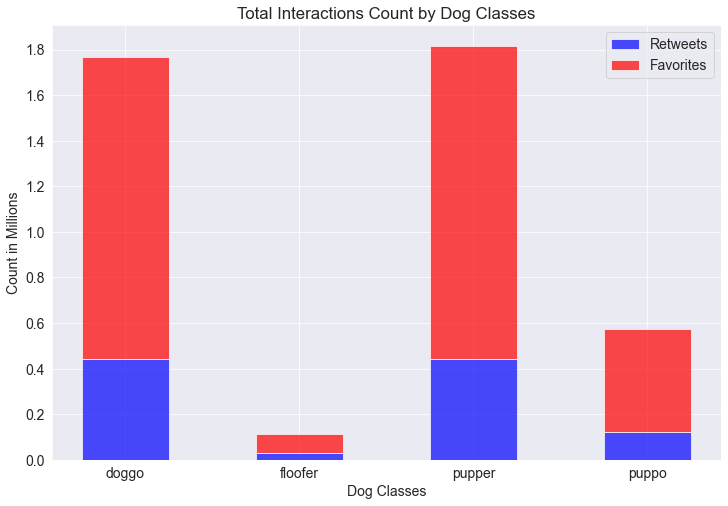

In [116]:
# Define chart parameters
barWidth = 0.5

# Display stacked bar chart
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '14'
plot1 = plt.bar(classes, class_retweets_ms, color='b', width=barWidth, alpha=.7)
plot2 = plt.bar(classes, class_faves_ms, bottom=class_retweets_ms, color='r', width=barWidth, alpha=.7)

# Title, labels and Ticks
plt.ylabel('Count in Millions')
plt.xlabel('Dog Classes')
plt.title('Total Interactions Count by Dog Classes')
plt.yticks(np.arange(2, step=0.2))

# legend
plt.legend((plot1[0], plot2[0]), ('Retweets', 'Favorites'))

plt.show();

- Proportion of Interactions (i.e. Retweets and Favorites) based on dog class.

In [117]:
# Create list of total interaction count by dog class excluding dog class 'others'
class_interact = list(dog_class_interact)
del class_interact[2]
# Calculate sum total of interaction count excluding dog class 'others'
total = sum(class_interact)

In [118]:
# Calculate proportion
class_retweet_proportions = [x/total for x in class_retweets] 
class_retweet_proportions

[0.10345313287840625,
 0.006981839962844632,
 0.10335556494058767,
 0.029040149089424407]

In [119]:
# Calculate proportion
class_faves_proportions = [x/total for x in class_faves]
class_faves_proportions

[0.3105716147493709,
 0.019696088742368,
 0.3218822422843532,
 0.10501936735264492]

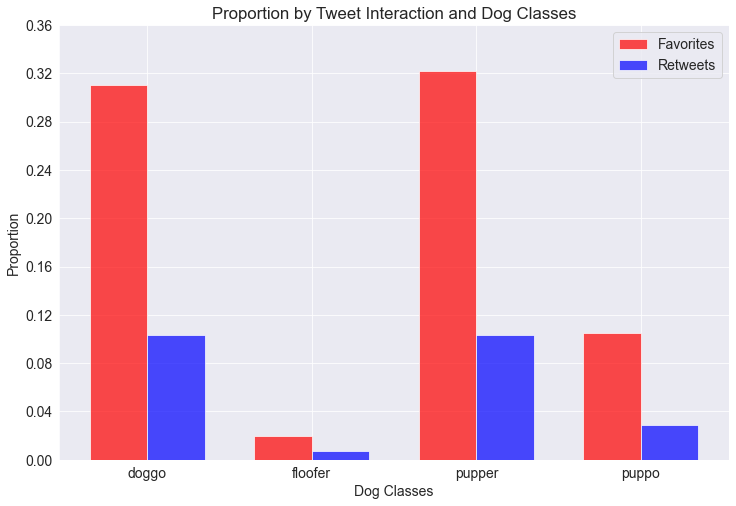

In [120]:
# Define chart parameters
ind = np.arange(len(classes))
width = .35

# Display multiple bar chart
plt.figure(figsize=(12,8))
red_bars = plt.bar(ind, class_faves_proportions, width, color='r', alpha=.7, label='Favorites')
blue_bars = plt.bar(ind + width, class_retweet_proportions, width, color='b', alpha=.7, label='Retweets')

# Title, labels and Ticks
plt.ylabel('Proportion')
plt.xlabel('Dog Classes')
plt.title('Proportion by Tweet Interaction and Dog Classes')
locations = ind + width / 2  # xtick locations
labels = classes  # xtick labels
plt.xticks(locations, labels)
plt.yticks(np.arange(0.4, step=0.04)) # ytick labels

# legend
plt.legend();

- Total Interactions Count based on dog breed.

In [121]:
# Create sorted list of top 11 dog breeds
sort_breeds = breeds_retweet.head(11).sort_index()

breeds = list(sort_breeds.index)

In [122]:
# Create list of top 11 dog breeds based on favorite count
fave_breeds = list(breeds_faves.head(11).sort_index())
fave_breeds_ms = [x/1000000 for x in fave_breeds] # favorite count in millions

In [123]:
# Create list of top 11 dog breeds based on retweet count
rt_breeds = list(breeds_retweet.head(11).sort_index())
rt_breeds_ms = [x/1000000 for x in rt_breeds] # retweet count in millions

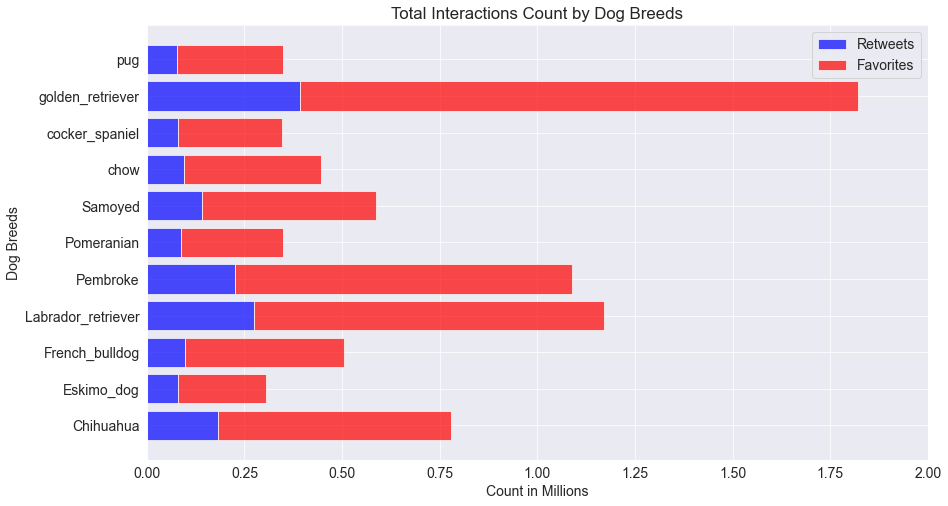

In [124]:
# Display stacked bar chart
plt.figure(figsize=(14,8))
plot1 = plt.barh(breeds, rt_breeds_ms, color='b', alpha=.7)
plot2 = plt.barh(breeds, fave_breeds_ms, left=rt_breeds_ms, color='r', alpha=.7)

# Title, labels and Ticks
plt.xlabel('Count in Millions')
plt.ylabel('Dog Breeds')
plt.title('Total Interactions Count by Dog Breeds')
plt.xticks(np.arange(0, 2.25, step = 0.25))

# legend
plt.legend((plot1[0], plot2[0]), ('Retweets', 'Favorites'))

plt.show();

- Number of tweets by month and year.

In [125]:
# Group by year and month and show number of tweets for each month in each year
year_month = clean_twtarchive_master.groupby(['tweet_year','tweet_month']).tweet_id.count()

# Create a dataframe with the total number of tweets based on year and month
tweets_per_year = pd.DataFrame(year_month)
tweets_per_year.reset_index(inplace=True)

In [126]:
# Subset tweet counts for each year
tweets2015 = tweets_per_year[tweets_per_year['tweet_year'] == 2015]
tweets2016 = tweets_per_year[tweets_per_year['tweet_year'] == 2016]
tweets2017 = tweets_per_year[tweets_per_year['tweet_year'] == 2017]

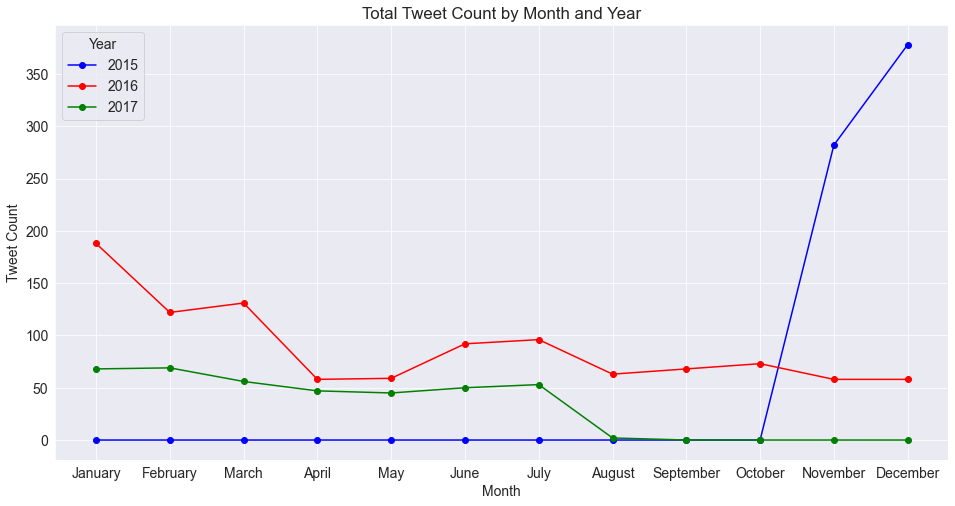

In [127]:
# Display line chart
plt.figure(figsize=(16,8))
y2015 = plt.plot(tweets2015['tweet_month'], tweets2015['tweet_id'], marker='o', color = 'b')
y2016 = plt.plot(tweets2016['tweet_month'], tweets2016['tweet_id'], marker='o', color='r')
y2017 = plt.plot(tweets2017['tweet_month'], tweets2017['tweet_id'], marker='o', color = 'g')

# Title and labels
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Total Tweet Count by Month and Year')

# legend
plt.legend((y2015[0],y2016[0],y2017[0]), ('2015','2016','2017'), title='Year')

plt.show();

### Insights:
1. The tweet with the highest number of interactions has 214,397 interactions. It was published on the 18th of June in the year 2016 and it is about a doggo, predicted to be a labrador retriever at a confidence level of 82%, with a dog rating of 13/10.

2. Tweets about dogs who are classified as doggos have more retweets than floofers, puppers and puppos. Conversely, tweets about floofers are the least retweeted.

3. Tweets that are about puppers are favored more as compared to doggos, floofers, and puppos. 

4. Tweets which are about dogs who are classified as floofers are the least retweeted and also the least favored, hence they have the lowest interaction.

5. Tweets about dogs which are puppers have the most interaction in terms of retweets and favorites as compared with doggos, floofers and puppos.

6. WeRateDogs tweeted a lot more in the year, 2016 as compared to 2015 and they significantly tweeted more in the months of November, December and January.

7. Dog that are golden retrievers have the highest retweet count and favorite count; basically the highest interaction.

8. WeRateDogs tweeted most towards the ending of 2015 and the beginning of 2016, after which their tweet frequency steadily declined until their lowest periods in 2017. 